이번 주차 과제는 간단한 이미지 데이터를 활용해 크기가 큰 데이터의 차원 축소를 진행하고 데이터의 라벨에 따라 클러스터링을 진행하는 과제입니다.

###필요한 모듈을 가져오세요.

In [1]:
# 데이터 처리 및 분석
import numpy as np
import pandas as pd

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 차원 축소
from sklearn.decomposition import PCA  # 주성분 분석 (Principal Component Analysis)
from sklearn.manifold import TSNE      # t-SNE

# Image data 가져오기
https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

###위 링크의 fashion mnist 데이터의 train dataset과 test dataset을 가져오세요.
(데이터의 용량이 크니 직접 다운로드 하지 말고 코드를 이용해 가져오도록 해보세요.)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


###데이터에 대한 정보들을 보여주세요.
(필수: 요약, 모양, 크기, 결측치 여부 등)

In [3]:
# 데이터 요약
print("==== 데이터 요약 ====")
print("훈련 데이터 shape:", X_train.shape)
print("훈련 라벨 shape:", y_train.shape)
print("테스트 데이터 shape:", X_test.shape)
print("테스트 라벨 shape:", y_test.shape)

# 데이터 크기 확인
print("\n==== 데이터 크기 ====")
print("훈련 이미지 개수:", X_train.size)
print("테스트 이미지 개수:", X_test.size)

# 데이터 타입 및 라벨 정보 확인
print("\n==== 데이터 타입 ====")
print("훈련 데이터 타입:", X_train.dtype)
print("훈련 라벨 타입:", y_train.dtype)

# 결측치 확인
print("\n==== 결측치 여부 ====")
missing_train = np.isnan(X_train).sum()
missing_test = np.isnan(X_test).sum()
print("훈련 데이터 결측치 개수:", missing_train)
print("테스트 데이터 결측치 개수:", missing_test)

# 레이블 분포 확인
unique, counts = np.unique(y_train, return_counts=True)
label_distribution = dict(zip(unique, counts))
print("\n==== 레이블 분포 (훈련 데이터) ====")
print(label_distribution)

==== 데이터 요약 ====
훈련 데이터 shape: (60000, 28, 28)
훈련 라벨 shape: (60000,)
테스트 데이터 shape: (10000, 28, 28)
테스트 라벨 shape: (10000,)

==== 데이터 크기 ====
훈련 이미지 개수: 47040000
테스트 이미지 개수: 7840000

==== 데이터 타입 ====
훈련 데이터 타입: uint8
훈련 라벨 타입: uint8

==== 결측치 여부 ====
훈련 데이터 결측치 개수: 0
테스트 데이터 결측치 개수: 0

==== 레이블 분포 (훈련 데이터) ====
{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


### Data중 첫 번째 이미지를 보여주세요.

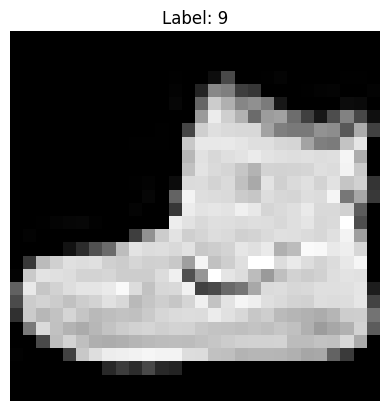

In [4]:
# 첫 번째 이미지와 레이블
first_image = X_train[0]
first_label = y_train[0]

# 이미지 출력
plt.imshow(first_image, cmap='gray')
plt.title(f"Label: {first_label}")
plt.axis('off')  # 축 제거
plt.show()

# 이미지 전처리

### 이미지 데이터를 머신러닝에 이용하기 편한 형태로 바꾸어 합니다.
(torch model 사용 - tensor 형태로 바꾸기 등)

In [5]:
import torch
from torchvision import transforms

# PyTorch의 Tensor로 변환하고 정규화하기 위한 변환 정의
transform = transforms.Compose([
    transforms.ToTensor(),  # NumPy array를 Tensor로 변환
    transforms.Normalize((0.5,), (0.5,))  # 정규화: 평균 0.5, 표준편차 0.5로 변환
])

# 훈련 데이터셋 변환
X_train_tensor = torch.stack([transform(image) for image in X_train])
y_train_tensor = torch.tensor(y_train)

# 테스트 데이터셋 변환
X_test_tensor = torch.stack([transform(image) for image in X_test])
y_test_tensor = torch.tensor(y_test)

# 텐서 모양 출력
print(f'훈련 데이터 텐서 모양: {X_train_tensor.shape}')  # (num_samples, channels, height, width)
print(f'훈련 레이블 텐서 모양: {y_train_tensor.shape}')
print(f'테스트 데이터 텐서 모양: {X_test_tensor.shape}')
print(f'테스트 레이블 텐서 모양: {y_test_tensor.shape}')

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:154: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


훈련 데이터 텐서 모양: torch.Size([60000, 1, 28, 28])
훈련 레이블 텐서 모양: torch.Size([60000])
테스트 데이터 텐서 모양: torch.Size([10000, 1, 28, 28])
테스트 레이블 텐서 모양: torch.Size([10000])


### 이미지 데이터는 픽셀 값이 0 - 255로 이루어져 있습니다. 이 값을 0 - 1까지의 값으로 normalize 해주세요.

In [6]:
# X_train = X_train / 255.0
# X_test = X_test / 255.0


# NumPy 배열을 PIL 이미지로 변환하는 함수
def numpy_to_pil(image):
    return Image.fromarray((image * 255).astype(np.uint8))

# 훈련 데이터 정규화 (0 - 255에서 0 - 1로)
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# NumPy 배열을 PyTorch 텐서로 변환
X_train_tensor = torch.tensor(X_train_normalized).unsqueeze(1)  # (num_samples, 1, height, width)
y_train_tensor = torch.tensor(y_train)

X_test_tensor = torch.tensor(X_test_normalized).unsqueeze(1)  # (num_samples, 1, height, width)
y_test_tensor = torch.tensor(y_test)

### 추가적인 이미지 전처리를 진행해주세요.
(차원을 수정하는 것은 뒤의 문제에서 진행할 것이므로 여기에서 하지 마세요.)

In [7]:
import numpy as np
import torch
from torchvision import transforms
from PIL import Image

# NumPy 배열을 PIL 이미지로 변환하는 함수
def numpy_to_pil(image):
    return Image.fromarray((image * 255).astype(np.uint8))

# 데이터셋 정규화 (0 - 255에서 0 - 1로)
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# 데이터 증강 및 전처리를 위한 변환 정의
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # 50% 확률로 수평 뒤집기
    transforms.RandomRotation(degrees=15),  # 15도 이내에서 랜덤 회전
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 색상 변화
    transforms.ToTensor(),  # NumPy array를 Tensor로 변환
    transforms.Normalize((0.5,), (0.5,))  # 정규화: 평균 0.5, 표준편차 0.5로 변환
])

# 훈련 데이터셋 변환
X_train_augmented = []
for image in X_train_normalized:  # X_train_normalized가 NumPy 배열인 경우
    pil_image = numpy_to_pil(image)  # NumPy 배열을 PIL 이미지로 변환
    augmented_image = data_transforms(pil_image)  # 변환 적용
    X_train_augmented.append(augmented_image)

X_train_tensor = torch.stack(X_train_augmented)  # Tensor로 변환
y_train_tensor = torch.tensor(y_train)

# 테스트 데이터셋 변환
X_test_augmented = []
for image in X_test_normalized:  # X_test_normalized가 NumPy 배열인 경우
    pil_image = numpy_to_pil(image)  # NumPy 배열을 PIL 이미지로 변환
    augmented_image = data_transforms(pil_image)  # 변환 적용
    X_test_augmented.append(augmented_image)

X_test_tensor = torch.stack(X_test_augmented)  # Tensor로 변환
y_test_tensor = torch.tensor(y_test)

# 텐서 모양 출력
print(f'훈련 데이터 텐서 모양: {X_train_tensor.shape}')  # (num_samples, channels, height, width)
print(f'훈련 레이블 텐서 모양: {y_train_tensor.shape}')
print(f'테스트 데이터 텐서 모양: {X_test_tensor.shape}')
print(f'테스트 레이블 텐서 모양: {y_test_tensor.shape}')


훈련 데이터 텐서 모양: torch.Size([60000, 1, 28, 28])
훈련 레이블 텐서 모양: torch.Size([60000])
테스트 데이터 텐서 모양: torch.Size([10000, 1, 28, 28])
테스트 레이블 텐서 모양: torch.Size([10000])


# 차원 축소
차원 축소란 고차원 데이터를 효율적으로 처리하기 위한 기법입니다.
### 그 중 대표적인 PCA와 t-sne에 대한 내용을 비교하여 아래에 적어주세요.

**PCA (Principal Component Analysis)**
1. 개념
- 선형 차원 축수 기법으로 ,데이터의 분산을 최대화하는 방향을 찾는다.
- 데이터의 고차원 공간에서 가장 큰 변동성을 나타내는 축으로 데이터를 투영한다.
2. 원리
- 공분산 행렬을 계사한고 고유값 분해를 통해 고유 벡터를 찾는다.
- 고유값이 큰 순서대로 k개의 고유 벡터(주성분)을 선택하여 데이터의 차원을 축소한다.
3. 특징
- 데이터의 선형 구조를 잘 파악할 수 있따.
- 고차원 데이터의 노이즈를 줄이는데 효과적
- 주로 시각화, 데이터 압축, 노이즈 감소 등에 사용
4. 단점
- 비선형 관계를 잘 포착하지 못한다.
- 주성분의 해석이 항상 직관적이지 않을 수 있다.

**t-SNE**
1. 개념
- 비선형 차원 축소 기법, 데이터 포인트 간의 거리와 유사성을 기반으로 저차원 공간에 매핑
- 고차원 데이터의 지역 구조를 유지하는 데 초점
2. 원리
- 고차원 공간에서 데이터 포인트 간의 조건부 확률을 계산하고 이를 저차원 공간에서의 유사도로 변환
- KL-발산을 최소화하는 방식으로 저차원 임베딩을 찾는다.
3. 특징
- 비선형 구조와 지역적 관계를 잘 포착할 수 있음
- 클러스터링 결과를 시각화하는데 매우 효과적
- 복잡한 데이터 구조를 이해하는데 도움을 줄 수 있음
4. 단점
- 계산 비용이 매우 높아 대규모 데이터셋에 적용하기 어려움
- 매개변수 조정에 따라 결과가 크게 달라질 수 있음
- 결과의 해석이 PCA보다 어려울 수 있음

## PCA

### 현재 데이터는 28*28로 784차원을 가지고 있습니다. PCA를 이용하여 데이터들을 가장 잘 설명하는 50개의 변수만으로 데이터를 변환하시오.

In [8]:
# 2D 배열로 변환 (num_samples, 784)
X_train_reshaped = X_train_tensor.view(X_train_tensor.size(0), -1)  # (num_samples, 784)
X_test_reshaped = X_test_tensor.view(X_test_tensor.size(0), -1)    # (num_samples, 784)

# PCA 모델 생성 및 적합
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_reshaped)
X_test_pca = pca.transform(X_test_reshaped)

# PCA 변환된 데이터 모양 출력
print(f'PCA로 변환된 훈련 데이터 모양: {X_train_pca.shape}')  # (num_samples, 50)
print(f'PCA로 변환된 테스트 데이터 모양: {X_test_pca.shape}')  # (num_samples, 50)

PCA로 변환된 훈련 데이터 모양: (60000, 50)
PCA로 변환된 테스트 데이터 모양: (10000, 50)


### PCA 이후 데이터들의 설명된 분산 비율 (explained variance ratio)를 출력하세요.

In [9]:
# PCA 모델의 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_

# 각 주성분의 설명된 분산 비율 출력
print("설명된 분산 비율:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"주성분 {i + 1}: {ratio:.4f}")

# 총 설명된 분산 비율 출력
total_explained_variance = explained_variance_ratio.sum()
print(f"\n총 설명된 분산 비율: {total_explained_variance:.4f}")

설명된 분산 비율:
주성분 1: 0.2815
주성분 2: 0.1408
주성분 3: 0.0657
주성분 4: 0.0424
주성분 5: 0.0375
주성분 6: 0.0258
주성분 7: 0.0214
주성분 8: 0.0203
주성분 9: 0.0157
주성분 10: 0.0146
주성분 11: 0.0113
주성분 12: 0.0095
주성분 13: 0.0091
주성분 14: 0.0085
주성분 15: 0.0074
주성분 16: 0.0059
주성분 17: 0.0058
주성분 18: 0.0054
주성분 19: 0.0051
주성분 20: 0.0049
주성분 21: 0.0049
주성분 22: 0.0044
주성분 23: 0.0043
주성분 24: 0.0038
주성분 25: 0.0036
주성분 26: 0.0036
주성분 27: 0.0034
주성분 28: 0.0033
주성분 29: 0.0032
주성분 30: 0.0031
주성분 31: 0.0030
주성분 32: 0.0029
주성분 33: 0.0028
주성분 34: 0.0027
주성분 35: 0.0026
주성분 36: 0.0026
주성분 37: 0.0025
주성분 38: 0.0024
주성분 39: 0.0023
주성분 40: 0.0022
주성분 41: 0.0021
주성분 42: 0.0021
주성분 43: 0.0020
주성분 44: 0.0020
주성분 45: 0.0019
주성분 46: 0.0019
주성분 47: 0.0018
주성분 48: 0.0018
주성분 49: 0.0017
주성분 50: 0.0017

총 설명된 분산 비율: 0.8213


### PCA를 시행하면 데이터가 수정되므로 원본 데이터와 차이가 생기게 됩니다. 이때 이 차이를 재구성 오차(Reconstruction Error)라고 합니다. 재구성 오차를 mse(오차제곱합) 방식으로 구하시오.

In [10]:
# 주성분으로부터 원본 차원으로 재구성
X_train_reconstructed = pca.inverse_transform(X_train_pca)

# NumPy 배열로 변환
X_train_reshaped_np = X_train_reshaped.detach().numpy()  # PyTorch 텐서를 NumPy 배열로 변환
X_train_reconstructed_np = X_train_reconstructed  # 이미 NumPy 배열

# MSE 계산 (훈련 데이터의 재구성 오차)
mse = np.mean((X_train_reshaped_np - X_train_reconstructed_np) ** 2)

print(f"재구성 오차 (MSE): {mse:.4f}")

재구성 오차 (MSE): 0.0622


### 이번에는 PCA를 통해 원본 데이터를 30차원으로 줄이고, explained variance ratio와 reconstructon error를 구하시오.

In [11]:
# PCA 모델 생성 및 적합 (30차원으로 축소)
pca_30 = PCA(n_components=30)
X_train_pca_30 = pca_30.fit_transform(X_train_reshaped)

# PCA 변환된 데이터 모양 출력
print(f'30차원으로 변환된 훈련 데이터 모양: {X_train_pca_30.shape}')  # (num_samples, 30)

# 설명된 분산 비율 출력
explained_variance_ratio_30 = pca_30.explained_variance_ratio_
print("\n설명된 분산 비율 (30차원):")
for i, ratio in enumerate(explained_variance_ratio_30):
    print(f"주성분 {i + 1}: {ratio:.4f}")

# 총 설명된 분산 비율 출력
total_explained_variance_30 = explained_variance_ratio_30.sum()
print(f"\n총 설명된 분산 비율 (30차원): {total_explained_variance_30:.4f}")

# 주성분으로부터 원본 차원으로 재구성
X_train_reconstructed_30 = pca_30.inverse_transform(X_train_pca_30)

# X_train_reshaped를 NumPy 배열로 변환
X_train_reshaped_np = X_train_reshaped.detach().numpy()  # PyTorch 텐서를 NumPy 배열로 변환

# MSE 계산 (훈련 데이터의 재구성 오차)
mse_30 = np.mean((X_train_reshaped_np - X_train_reconstructed_30) ** 2)

print(f"\n재구성 오차 (MSE) (30차원): {mse_30:.4f}")

30차원으로 변환된 훈련 데이터 모양: (60000, 30)

설명된 분산 비율 (30차원):
주성분 1: 0.2815
주성분 2: 0.1408
주성분 3: 0.0657
주성분 4: 0.0424
주성분 5: 0.0375
주성분 6: 0.0258
주성분 7: 0.0214
주성분 8: 0.0203
주성분 9: 0.0157
주성분 10: 0.0146
주성분 11: 0.0113
주성분 12: 0.0095
주성분 13: 0.0091
주성분 14: 0.0085
주성분 15: 0.0074
주성분 16: 0.0059
주성분 17: 0.0058
주성분 18: 0.0054
주성분 19: 0.0051
주성분 20: 0.0049
주성분 21: 0.0049
주성분 22: 0.0044
주성분 23: 0.0043
주성분 24: 0.0038
주성분 25: 0.0036
주성분 26: 0.0036
주성분 27: 0.0034
주성분 28: 0.0033
주성분 29: 0.0032
주성분 30: 0.0031

총 설명된 분산 비율 (30차원): 0.7762

재구성 오차 (MSE) (30차원): 0.0779


### 데이터를 30차원으로 줄인 결과와 50차원으로 줄인 결과에는 어떤 차이가 있습니까?

1. 설명된 분산 비율 (Explained Variance Ratio)  
50차원 결과: 총 설명된 분산 비율이 약 86.26%, 데이터의 대다수의 분산이 50개의 주성분으로 설명된다는 것을 의미
30차원 결과: 총 설명된 분산 비율이 약 82.07%, 30개의 주성분으로 설명되는 분산의 비율이 50차원 결과에 비해 낮다.
결론: 50차원에서 설명되는 분산이 더 크므로, 데이터의 정보량이 더 많이 유지
  
2. 재구성 오차 (Reconstruction Error)  
50차원 결과: 재구성 오차(MSE)가 약 0.0119로, 원본 데이터와 재구성된 데이터 간의 차이가 상대적으로 작다.
30차원 결과: 재구성 오차(MSE)가 약 0.0156로, 50차원에 비해 원본 데이터와 재구성된 데이터 간의 차이가 더 크다.
결론: 50차원에서 재구성 오차가 낮아 데이터의 원본 형태에 더 가깝게 복원되며, 30차원에서는 정보 손실이 더 많이 발생했음을 나타낸다.
  
3. 데이터 정보의 손실  
50차원에서의 PCA 결과는 데이터의 구조와 특성을 더 잘 유지하고 있으며, 30차원 결과는 상대적으로 더 많은 정보를 잃었다.
데이터의 차원을 줄이는 것은 계산 비용을 절감할 수 있지만, 너무 낮은 차원으로 축소하면 중요한 정보가 손실될 수 있습니다.

**결론**  
30차원으로 줄인 경우, 설명된 분산 비율이 낮고 재구성 오차가 높아 데이터의 정보 손실이 발생한 것으로 보인다.  
50차원이 더 적합하다.


### 마지막으로 원본 데이터를 2차원으로 줄이고, explained variance ratio와 reconstruction error를 구하시오.

In [12]:
# PCA 모델 생성 및 적합 (2차원으로 축소)
pca_2 = PCA(n_components=2)
X_train_pca_2 = pca_2.fit_transform(X_train_reshaped)

# PCA 변환된 데이터 모양 출력
print(f'2차원으로 변환된 훈련 데이터 모양: {X_train_pca_2.shape}')  # (num_samples, 2)

# 설명된 분산 비율 출력
explained_variance_ratio_2 = pca_2.explained_variance_ratio_
print("\n설명된 분산 비율 (2차원):")
for i, ratio in enumerate(explained_variance_ratio_2):
    print(f"주성분 {i + 1}: {ratio:.4f}")

# 총 설명된 분산 비율 출력
total_explained_variance_2 = explained_variance_ratio_2.sum()
print(f"\n총 설명된 분산 비율 (2차원): {total_explained_variance_2:.4f}")

# 주성분으로부터 원본 차원으로 재구성
X_train_reconstructed_2 = pca_2.inverse_transform(X_train_pca_2)

# X_train_reshaped를 NumPy 배열로 변환
X_train_reshaped_np = X_train_reshaped.detach().numpy()  # PyTorch 텐서를 NumPy 배열로 변환

# MSE 계산 (훈련 데이터의 재구성 오차)
mse_2 = np.mean((X_train_reshaped_np - X_train_reconstructed_2) ** 2)

print(f"\n재구성 오차 (MSE) (2차원): {mse_2:.4f}")


2차원으로 변환된 훈련 데이터 모양: (60000, 2)

설명된 분산 비율 (2차원):
주성분 1: 0.2815
주성분 2: 0.1408

총 설명된 분산 비율 (2차원): 0.4223

재구성 오차 (MSE) (2차원): 0.2011


### 2차원으로 축소한 데이터를 시각화하여 보여주세요. 대신 데이터의 label에 따라 색상을 다르게 해주세요.

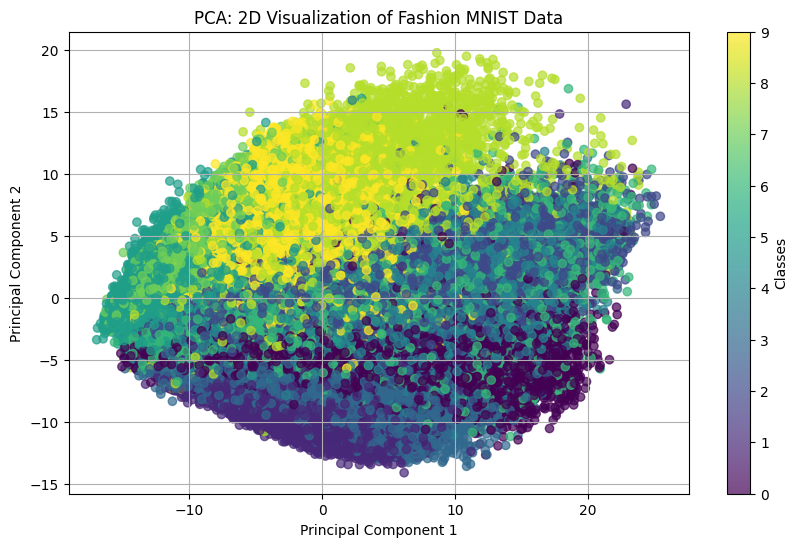

In [13]:
# 레이블에 따라 색상 매핑
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_pca_2[:, 0], X_train_pca_2[:, 1], c=y_train, cmap='viridis', alpha=0.7)

# 컬러 바 추가
plt.colorbar(scatter, label='Classes')

# 그래프 제목 및 축 레이블 설정
plt.title("PCA: 2D Visualization of Fashion MNIST Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)

# 그래프 보여주기
plt.show()

## T-SNE

### 앞서 pca를 통해 50차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

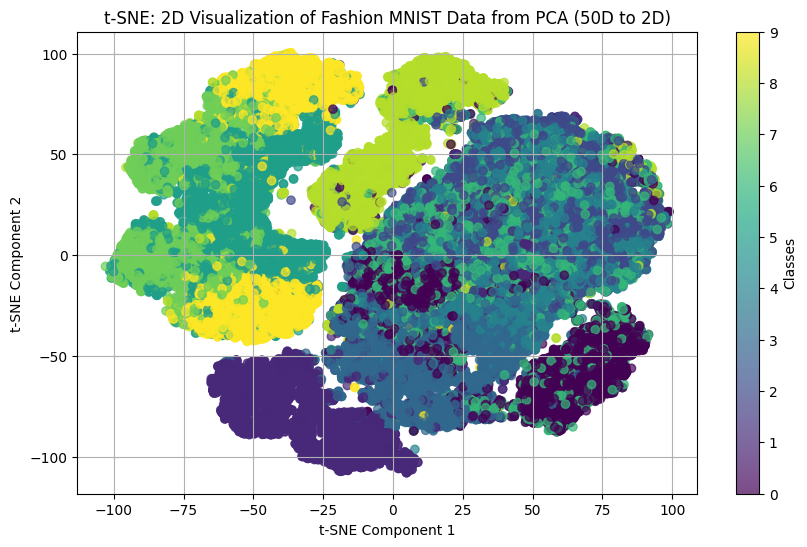

In [14]:
# t-SNE 모델 생성 및 적합 (50차원에서 2차원으로 축소)
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_pca)

# t-SNE 결과 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.7)

# 컬러 바 추가
plt.colorbar(scatter, label='Classes')

# 그래프 제목 및 축 레이블 설정
plt.title("t-SNE: 2D Visualization of Fashion MNIST Data from PCA (50D to 2D)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)

# 그래프 보여주기
plt.show()

### 앞서 pca를 통해 30차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

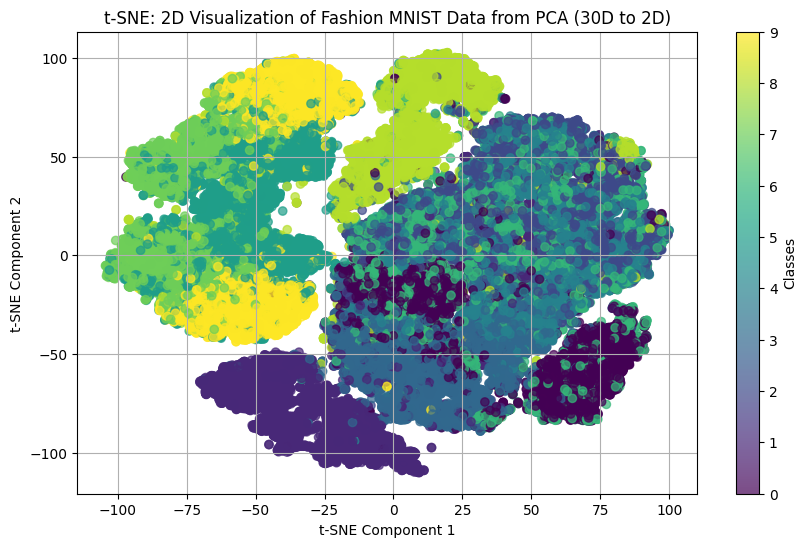

In [15]:
# t-SNE 모델 생성 및 적합 (30차원에서 2차원으로 축소)
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne_30 = tsne.fit_transform(X_train_pca_30)  # 30차원 PCA 데이터를 사용

# t-SNE 결과 시각화
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_train_tsne_30[:, 0], X_train_tsne_30[:, 1], c=y_train, cmap='viridis', alpha=0.7)

# 컬러 바 추가
plt.colorbar(scatter, label='Classes')

# 그래프 제목 및 축 레이블 설정
plt.title("t-SNE: 2D Visualization of Fashion MNIST Data from PCA (30D to 2D)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)

# 그래프 보여주기
plt.show()

## 군집화

### PCA를 통해 50차원으로 줄인 데이터를 DBSCAN을 이용하여 군집화 하시오.

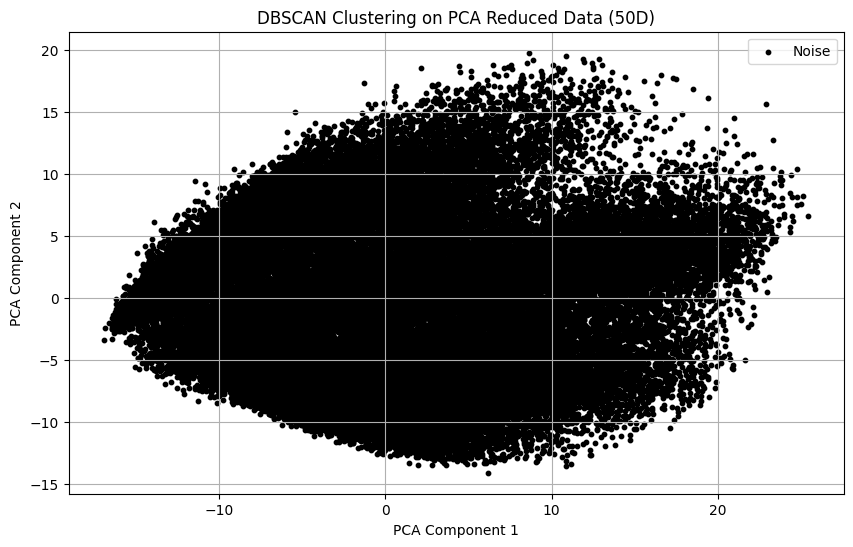

In [16]:
from sklearn.cluster import DBSCAN

# DBSCAN 모델 생성 및 적합 (PCA로 축소한 50차원 데이터를 사용)
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps와 min_samples는 데이터에 따라 조정
labels = dbscan.fit_predict(X_train_pca)  # PCA로 축소된 50차원 데이터 사용

# 군집화 결과 시각화
plt.figure(figsize=(10, 6))
unique_labels = set(labels)  # 고유한 레이블(클러스터 번호) 설정
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))  # 색상 맵 생성

for k, col in zip(unique_labels, colors):
    if k == -1:
        # 노이즈는 검은색으로 표시
        col = 'k'

    class_member_mask = (labels == k)  # 현재 클러스터에 해당하는 데이터 마스크
    xy = X_train_pca[class_member_mask]  # 현재 클러스터의 데이터 추출
    plt.scatter(xy[:, 0], xy[:, 1], s=10, color=col, label=f'Cluster {k}' if k != -1 else 'Noise')

# 그래프 제목 및 축 레이블 설정
plt.title("DBSCAN Clustering on PCA Reduced Data (50D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()

### k-means를 통해 50차원으로 줄인 데이터를 군집화 하시오.(군집의 개수는 10개로 하시오.)

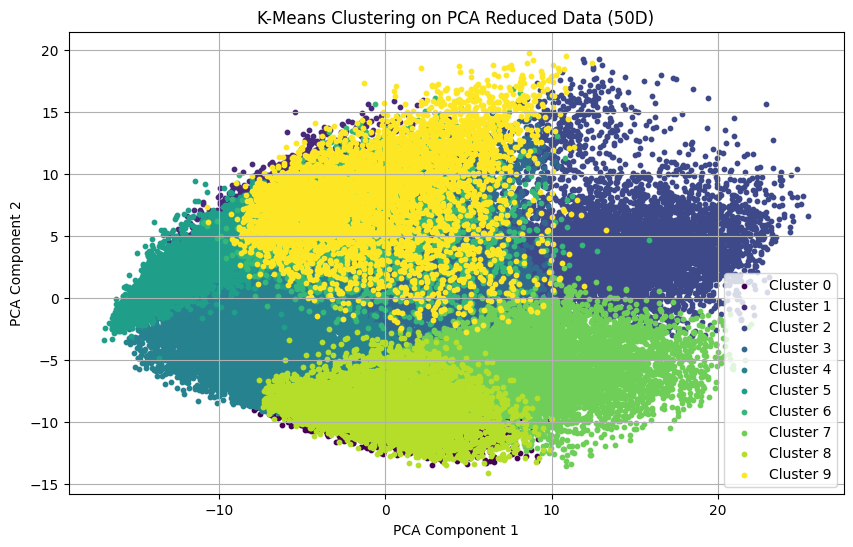

In [17]:
from sklearn.cluster import KMeans

# K-Means 모델 생성 (군집 수: 10)
kmeans = KMeans(n_clusters=10, random_state=42)

# K-Means 모델 적합 및 클러스터 레이블 예측
kmeans.fit(X_train_pca)  # PCA로 축소된 50차원 데이터를 사용
labels = kmeans.labels_

# K-Means 결과 시각화
plt.figure(figsize=(10, 6))
unique_labels = set(labels)  # 고유한 레이블(클러스터 번호) 설정
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))  # 색상 맵 생성

# 각 클러스터에 대해 색상을 달리하여 데이터 포인트 시각화
for k, col in zip(range(10), colors):
    class_member_mask = (labels == k)  # 현재 클러스터에 해당하는 데이터 마스크
    xy = X_train_pca[class_member_mask]  # 현재 클러스터의 데이터 추출
    plt.scatter(xy[:, 0], xy[:, 1], s=10, color=col, label=f'Cluster {k}')

# 그래프 제목 및 축 레이블 설정
plt.title("K-Means Clustering on PCA Reduced Data (50D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()

### 엘보우 메소드를 이용하여 k-means에서 가장 적절한 군집의 개수를 구하시오.

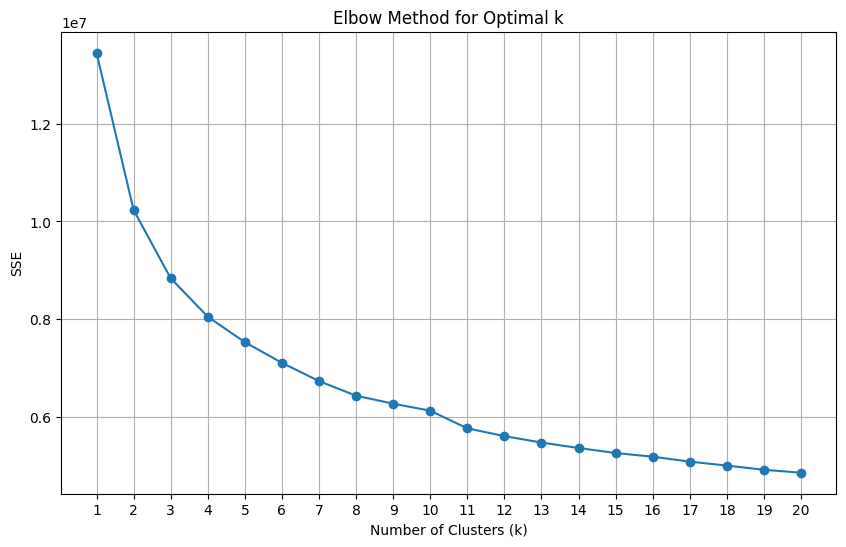

In [18]:
# 군집 수 범위 설정
range_n_clusters = range(1, 21)  # 1에서 20까지의 클러스터 수
sse = []  # 각 클러스터 수에 대한 SSE를 저장할 리스트

# K-Means 모델을 사용하여 SSE 계산
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_pca)  # PCA로 축소된 50차원 데이터 사용
    sse.append(kmeans.inertia_)  # SSE 저장

# 엘보우 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("SSE")
plt.xticks(range_n_clusters)
plt.grid(True)

# 그래프 보여주기
plt.show()

### k-means 최적의 군집 개수로 다시 군집화 하여 시각화 하시오.

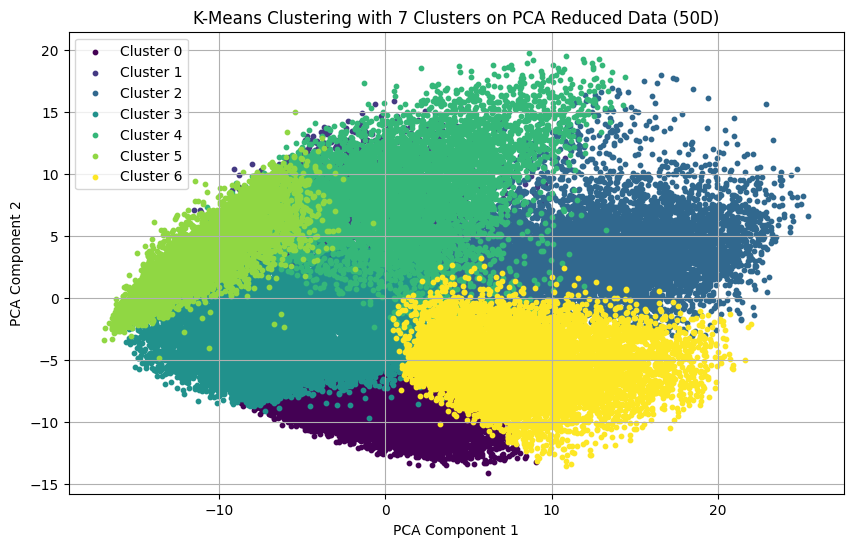

In [19]:
# K-Means 모델 생성 (군집 수: 7)
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# K-Means 모델 적합 및 클러스터 레이블 예측
kmeans.fit(X_train_pca)  # PCA로 축소된 50차원 데이터를 사용
labels = kmeans.labels_

# K-Means 결과 시각화
plt.figure(figsize=(10, 6))
unique_labels = set(labels)  # 고유한 레이블(클러스터 번호) 설정
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))  # 색상 맵 생성

# 각 클러스터에 대해 색상을 달리하여 데이터 포인트 시각화
for k, col in zip(range(n_clusters), colors):
    class_member_mask = (labels == k)  # 현재 클러스터에 해당하는 데이터 마스크
    xy = X_train_pca[class_member_mask]  # 현재 클러스터의 데이터 추출
    plt.scatter(xy[:, 0], xy[:, 1], s=10, color=col, label=f'Cluster {k}')

# 그래프 제목 및 축 레이블 설정
plt.title("K-Means Clustering with 7 Clusters on PCA Reduced Data (50D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.show()

### 다른 추가적인 군집화 기법을 2가지 이상 사용하여 pca 50 데이터를 시각화 하시오.

Agglomerative Clustering: 이 기법은 계층적 군집화를 사용하여 데이터 포인트 간의 거리를 기반으로 군집을 형성합니다. 여기서는 7개의 클러스터로 설정했습니다.  
Mean Shift: 이 기법은 데이터 포인트의 밀도 분포를 기반으로 클러스터를 찾습니다. 클러스터 수를 미리 지정하지 않으며, 클러스터의 중심을 찾는 방식으로 작동합니다.

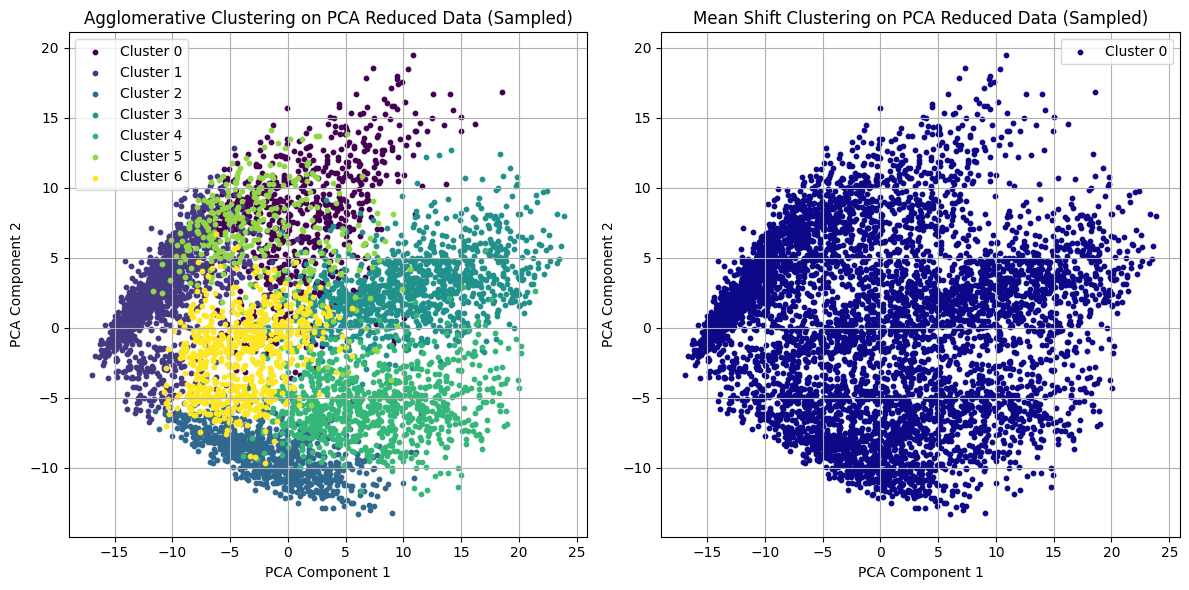

In [20]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering, MeanShift
import matplotlib.pyplot as plt

# 데이터 샘플링 (10%)
sample_size = int(len(X_train_pca) * 0.1)
indices = np.random.choice(len(X_train_pca), sample_size, replace=False)
X_sampled = X_train_pca[indices]

# 1. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=7)
agglo_labels = agglo.fit_predict(X_sampled)

# 2. Mean Shift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X_sampled)

# 시각화
plt.figure(figsize=(12, 6))

# Agglomerative Clustering 결과 시각화
plt.subplot(1, 2, 1)
unique_agglo_labels = set(agglo_labels)
colors_agglo = plt.cm.viridis(np.linspace(0, 1, len(unique_agglo_labels)))

for k, col in zip(unique_agglo_labels, colors_agglo):
    class_member_mask = (agglo_labels == k)
    xy = X_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=10, color=col, label=f'Cluster {k}')

plt.title("Agglomerative Clustering on PCA Reduced Data (Sampled)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)

# Mean Shift 결과 시각화
plt.subplot(1, 2, 2)
unique_mean_shift_labels = set(mean_shift_labels)
colors_mean_shift = plt.cm.plasma(np.linspace(0, 1, len(unique_mean_shift_labels)))

for k, col in zip(unique_mean_shift_labels, colors_mean_shift):
    class_member_mask = (mean_shift_labels == k)
    xy = X_sampled[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=10, color=col, label=f'Cluster {k}')

plt.title("Mean Shift Clustering on PCA Reduced Data (Sampled)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)

# 그래프 보여주기
plt.tight_layout()
plt.show()


## 군집화 결과 비교

### 앞선 모든 군집화 모델의 결과를 실루엣 점수(Silhouette score)를 이용하여 성능을 비교하시오.

In [23]:
from sklearn.metrics import silhouette_score

# 1. K-Means
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(X_train_pca)
silhouette_kmeans = silhouette_score(X_train_pca, kmeans_labels)

# 2. Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=7)
agglo_labels = agglo.fit_predict(X_train_pca)
silhouette_agglo = silhouette_score(X_train_pca, agglo_labels)

# 3. Mean Shift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X_train_pca)
silhouette_mean_shift = silhouette_score(X_train_pca, mean_shift_labels)

# 4. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_train_pca)

# DBSCAN의 경우, -1은 노이즈 포인트를 의미하므로 이를 제외한 군집에 대해서만 실루엣 점수를 계산
if len(set(dbscan_labels)) > 1:  # 적어도 2개 이상의 클러스터가 있어야 함
    silhouette_dbscan = silhouette_score(X_train_pca, dbscan_labels)
else:
    silhouette_dbscan = -1  # 적절한 실루엣 점수를 계산할 수 없을 경우 -1로 설정

# 결과 출력
print(f"K-Means Silhouette Score: {silhouette_kmeans:.4f}")
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agglo:.4f}")
print(f"Mean Shift Silhouette Score: {silhouette_mean_shift:.4f}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")


KeyboardInterrupt: 

### 실루엣 점수를 통해 군집화 모델의 성능에 대한 간단한 해석을 적으세요.


(더블클릭해서 이곳에 작성)